# chest-xray-pneumonia/chest_xray

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:
# Kaggle imports
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



In [3]:
# Set paths
base_dir = '/kaggle/input/chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


In [4]:

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [5]:

# Load pretrained ResNet50
def create_resnet50(input_shape=(224, 224, 3), num_classes=1):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='sigmoid')(x)
    model = models.Model(inputs=base_model.input, outputs=output)
    
    # Freeze the base model layers for transfer learning
    for layer in base_model.layers:
        layer.trainable = False
    
    return model


In [6]:

# Compile the model
model = create_resnet50()
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [7]:

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733118712.877440     391 service.cc:145] XLA service 0x78ebe00020c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733118712.877517     391 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733118712.877523     391 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/163 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.4375 - loss: 1.0564 

I0000 00:00:1733118719.506365     391 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


163/163 ━━━━━━━━━━━━━━━━━━━━ 108s 561ms/step - accuracy: 0.7129 - loss: 0.6164 - val_accuracy: 0.5000 - val_loss: 0.8240
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 535ms/step - accuracy: 0.7360 - loss: 0.5533 - val_accuracy: 0.5000 - val_loss: 0.8457
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 90s 528ms/step - accuracy: 0.7474 - loss: 0.5088 - val_accuracy: 0.5000 - val_loss: 0.7210
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 90s 528ms/step - accuracy: 0.7498 - loss: 0.4790 - val_accuracy: 0.5000 - val_loss: 0.8426
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 91s 531ms/step - accuracy: 0.7625 - loss: 0.4518 - val_accuracy: 0.5625 - val_loss: 0.8259
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 92s 539ms/step - accuracy: 0.7678 - loss: 0.4411 - val_accuracy: 0.5625 - val_loss: 0.6502
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 92s 539ms/step - accuracy: 0.7818 - loss: 0.4173 - val_accuracy: 0.5625 - val_loss: 0.7474
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 92s 540ms/step - accuracy: 0.7806 - loss: 0.4230 - va

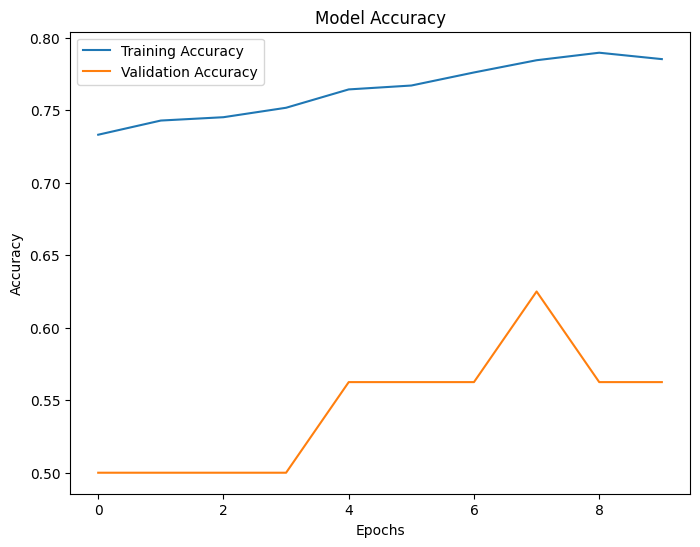

In [8]:

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


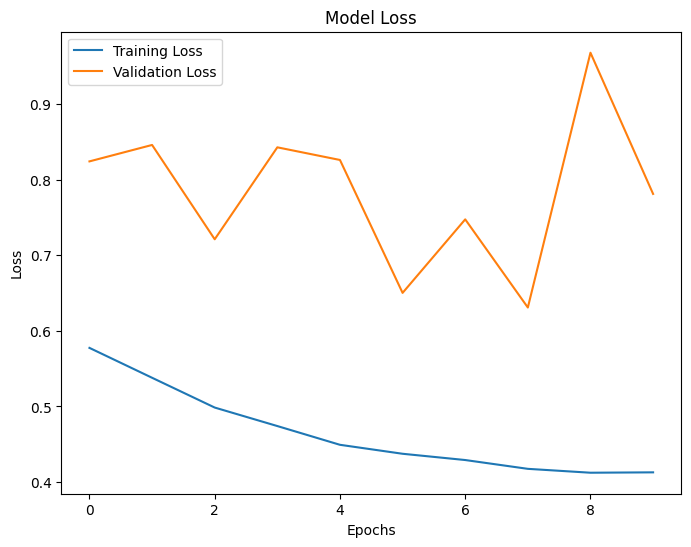

In [9]:

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Save the model
model.save('/kaggle/working/chest_xray_resnet50.h5')


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.7580 - loss: 0.4865
Test Loss: 0.49770796298980713
Test Accuracy: 0.7339743375778198


In [11]:
# Analyze overfitting or underfitting
def analyze_fit(history):
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    # Compute the differences between training and validation metrics
    acc_diff = training_accuracy[-1] - validation_accuracy[-1]
    loss_diff = validation_loss[-1] - training_loss[-1]

    print(f"Final Training Accuracy: {training_accuracy[-1]:.4f}")
    print(f"Final Validation Accuracy: {validation_accuracy[-1]:.4f}")
    print(f"Accuracy Difference (Training - Validation): {acc_diff:.4f}\n")
    print(f"Final Training Loss: {training_loss[-1]:.4f}")
    print(f"Final Validation Loss: {validation_loss[-1]:.4f}")
    print(f"Loss Difference (Validation - Training): {loss_diff:.4f}\n")

    # Interpret the differences
    if acc_diff > 0.1 and loss_diff > 0.1:  # Arbitrary thresholds
        print("The model is likely overfitting. Try techniques like regularization or dropout.")
    elif acc_diff < -0.1:
        print("The model might be underfitting. Consider increasing model capacity or training longer.")
    else:
        print("The model seems to have a good fit. Continue fine-tuning for optimal performance.")

# Call the function to analyze fit
analyze_fit(history)


Final Training Accuracy: 0.7853
Final Validation Accuracy: 0.5625
Accuracy Difference (Training - Validation): 0.2228

Final Training Loss: 0.4129
Final Validation Loss: 0.7810
Loss Difference (Validation - Training): 0.3681

The model is likely overfitting. Try techniques like regularization or dropout.
